# Australian Road Deaths Database
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
road_crash = pd.read_csv("Fatal_Crashes_December_2017.csv")

In [66]:
road_crash.head()

,CrashID,State,Date,Month,Year,Dayweek,Time,Crash_Type,Number_of_Fatalities,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit
0,3201701010001,QLD,01-JAN-2017,1,2017,Sunday,0:00:00,Pedestrian,1,No,No,No,50
1,5201701010001,WA,01-JAN-2017,1,2017,Sunday,16:30:00,Multiple vehicle,1,No,No,No,100
2,5201701010002,WA,01-JAN-2017,1,2017,Sunday,17:14:00,Multiple vehicle,1,No,No,No,70
3,1201701020001,NSW,02-JAN-2017,1,2017,Monday,18:10:00,Single vehicle,1,No,No,No,50
4,1201701020002,NSW,02-JAN-2017,1,2017,Monday,13:15:00,Multiple vehicle,1,No,No,No,80


In [41]:
  road_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43645 entries, 0 to 43644
Data columns (total 13 columns):
CrashID                          43645 non-null int64
State                            43645 non-null object
Date                             43645 non-null object
Month                            43645 non-null int64
Year                             43645 non-null int64
Dayweek                          43645 non-null object
Time                             43645 non-null object
Crash_Type                       43645 non-null object
Number_of_Fatalities             43645 non-null int64
Bus_Involvement                  43645 non-null object
Heavy_Rigid_Truck_Involvement    43645 non-null object
Articulated_Truck_Involvement    43645 non-null object
Speed_Limit                      43645 non-null object
dtypes: int64(4), object(9)
memory usage: 4.3+ MB


In [42]:
road_crash.describe()

,CrashID,Month,Year,Number_of_Fatalities
count,4.364500e+04,43645.000000,43645.000000,43645.000000
mean,2.932166e+12,6.588200,2001.399221,1.113346
std,1.710248e+12,3.454968,8.319840,0.453812
min,1.198901e+12,1.000000,1989.000000,1.000000
25%,1.201001e+12,4.000000,1994.000000,1.000000
50%,2.201203e+12,7.000000,2001.000000,1.000000
75%,4.199404e+12,10.000000,2008.000000,1.000000
max,8.201711e+12,12.000000,2017.000000,35.000000


# Missing data

In [69]:
road_crash.isnull().sum()

CrashID                          0
State                            0
Date                             0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash_Type                       0
Number_of_Fatalities             0
Bus_Involvement                  0
Heavy_Rigid_Truck_Involvement    0
Articulated_Truck_Involvement    0
Speed_Limit                      0
dtype: int64

# Exploratory Data Analysis

In [44]:
#Number of fatalaties in each state
road_crash["State"].value_counts()

NSW    13561
VIC     9662
QLD     8576
WA      5141
SA      3719
NT      1309
TAS     1267
ACT      410
Name: State, dtype: int64

In [45]:
road_crash["Number_of_Fatalities"].value_counts()

1     39800
2      3098
3       543
4       142
5        39
6        14
7         3
11        2
20        1
12        1
10        1
35        1
Name: Number_of_Fatalities, dtype: int64

In [78]:
#Which state has the highest number of fatalaties ?
road_crash.groupby("State")['Number_of_Fatalities'].sum()


State
ACT      448
NSW    15109
NT      1499
QLD     9548
SA      4189
TAS     1428
VIC    10692
WA      5679
Name: Number_of_Fatalities, dtype: int64

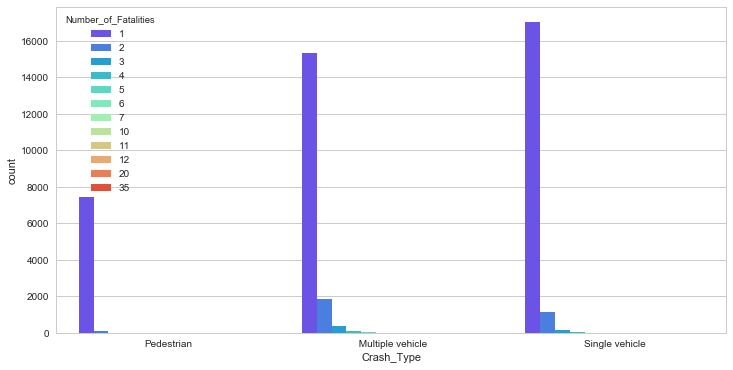

In [10]:
#what type pf crashes are most common?
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='Crash_Type',hue='Number_of_Fatalities',data=road_crash,palette='rainbow')

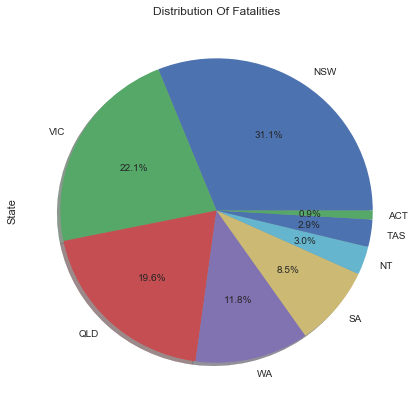

In [83]:
#lets check the distribution of States
road_crash['State'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%',shadow=True)
plt.title('Distribution Of Fatalities')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

# Correlating Fatalities and States

In [11]:
#How many pedestrian died in each state?
road_crash[road_crash['Crash_Type']=='Pedestrian']['State'].value_counts()

NSW    2648
VIC    1787
QLD    1310
WA      684
SA      605
NT      291
TAS     160
ACT      62
Name: State, dtype: int64

In [12]:
road_crash[road_crash['Crash_Type']=='Single vehicle']['State'].value_counts()

NSW    5226
QLD    3746
VIC    3621
WA     2625
SA     1665
NT      792
TAS     572
ACT     156
Name: State, dtype: int64

In [13]:
road_crash["Crash_Type"].unique()

array(['Pedestrian', ' Multiple vehicle', 'Single vehicle'], dtype=object)

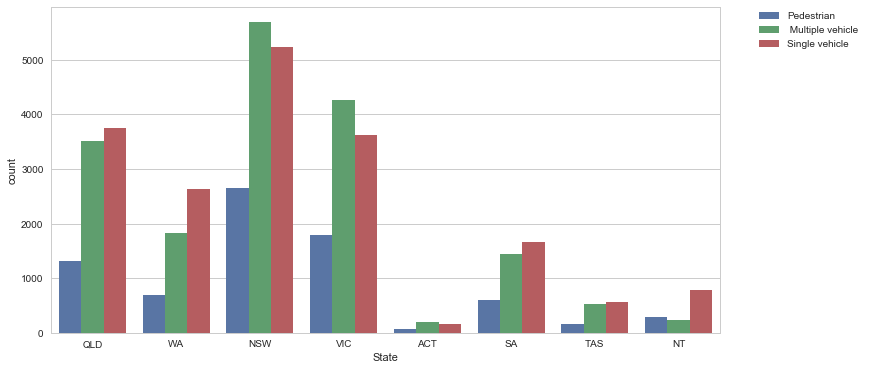

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='State',data= road_crash,hue='Crash_Type',palette='deep')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

In [85]:
#Looks like a wrong values 
road_crash[road_crash["Speed_Limit"]=='900'].head()

,CrashID,State,Date,Month,Year,Dayweek,Time,Crash_Type,Number_of_Fatalities,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit
11820,7200701010001,NT,01-JAN-2007,1,2007,Monday,15:00:00,Single vehicle,1,No,No,No,900
12654,7200707270024,NT,27-JUL-2007,7,2007,Friday,12:00:00,Single vehicle,1,No,No,No,900
13506,7200602250002,NT,25-FEB-2006,2,2006,Saturday,0:10:00,Single vehicle,1,No,No,No,900
13507,7200602250003,NT,25-FEB-2006,2,2006,Saturday,12:30:00,Multiple vehicle,1,No,No,Yes,900
13609,7200603250005,NT,25-MAR-2006,3,2006,Saturday,21:17:00,Multiple vehicle,1,No,No,No,900


In [86]:
#Lets Focus on Year
by_Year = road_crash.groupby('Year').count()
by_Year.head()

,CrashID,State,Date,Month,Dayweek,Time,Crash_Type,Number_of_Fatalities,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit
Year,,,,,,,,,,,,
1989,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407
1990,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050,2050
1991,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874
1992,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736,1736
1993,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737


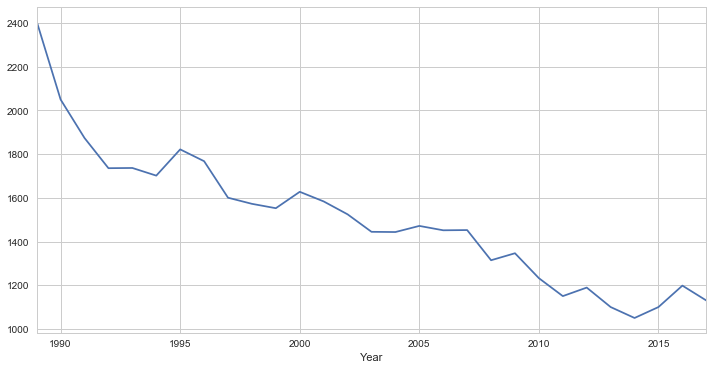

In [87]:
#every year number of fatalities are decreasing which is good 
plt.figure(figsize=(12,6))
by_Year['State'].plot()

In [88]:
by_month = road_crash.groupby('Month').count()
by_month.head()

,CrashID,State,Date,Year,Dayweek,Time,Crash_Type,Number_of_Fatalities,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit
Month,,,,,,,,,,,,
1,3487,3487,3487,3487,3487,3487,3487,3487,3487,3487,3487,3487
2,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273,3273
3,3865,3865,3865,3865,3865,3865,3865,3865,3865,3865,3865,3865
4,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
5,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732


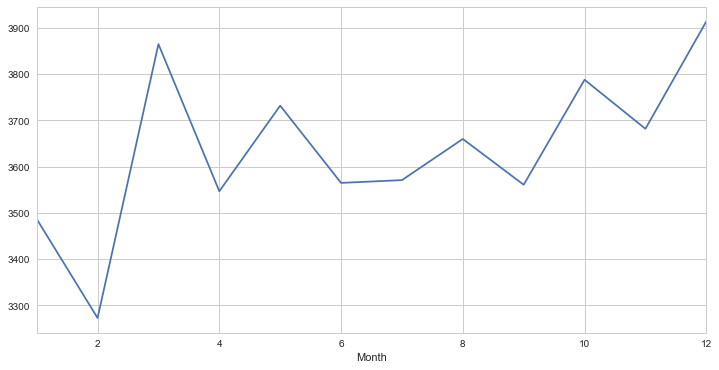

In [89]:
plt.figure(figsize=(12,6))
by_month['State'].plot()

The chart suggests that fatalities incrases in the months of December. This can be related to the holiday season (Christmas and New Year) where people tends to drink more during this month.

# Fatalities where Trucks were involved 

In [90]:
trucks = road_crash[road_crash["Articulated_Truck_Involvement"]=='Yes']
trucks.head()

,CrashID,State,Date,Month,Year,Dayweek,Time,Crash_Type,Number_of_Fatalities,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit
7,1201701030003,NSW,03-JAN-2017,1,2017,Tuesday,14:15:00,Multiple vehicle,2,No,Yes,Yes,100
11,1201701050004,NSW,05-JAN-2017,1,2017,Thursday,10:18:00,Pedestrian,1,No,No,Yes,60
22,3201701100007,QLD,10-JAN-2017,1,2017,Tuesday,12:00:00,Pedestrian,1,No,Yes,Yes,100
27,2201701110005,VIC,11-JAN-2017,1,2017,Wednesday,14:30:00,Multiple vehicle,1,No,No,Yes,100
52,2201701170011,VIC,17-JAN-2017,1,2017,Tuesday,16:00:00,Multiple vehicle,1,No,No,Yes,110


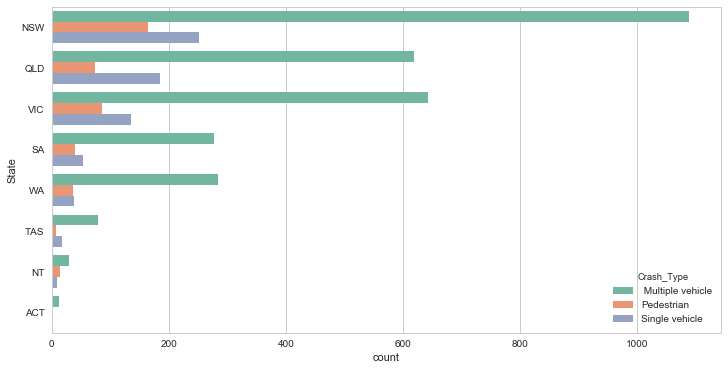

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(y='State',data= trucks,hue='Crash_Type',palette='Set2')

# Correlation 

In [92]:
road_crash.head()

,CrashID,State,Date,Month,Year,Dayweek,Time,Crash_Type,Number_of_Fatalities,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,Speed_Limit
0,3201701010001,QLD,01-JAN-2017,1,2017,Sunday,0:00:00,Pedestrian,1,No,No,No,50
1,5201701010001,WA,01-JAN-2017,1,2017,Sunday,16:30:00,Multiple vehicle,1,No,No,No,100
2,5201701010002,WA,01-JAN-2017,1,2017,Sunday,17:14:00,Multiple vehicle,1,No,No,No,70
3,1201701020001,NSW,02-JAN-2017,1,2017,Monday,18:10:00,Single vehicle,1,No,No,No,50
4,1201701020002,NSW,02-JAN-2017,1,2017,Monday,13:15:00,Multiple vehicle,1,No,No,No,80


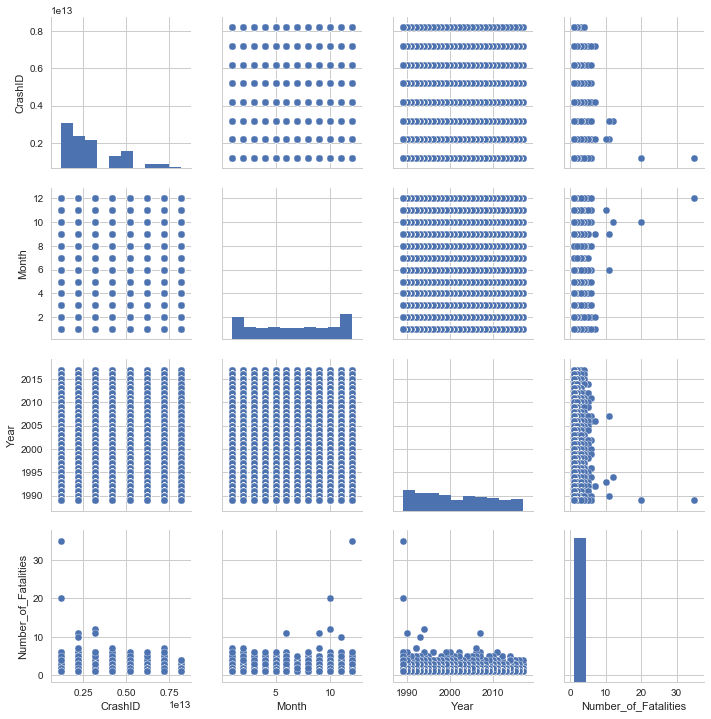

In [93]:
sns.pairplot(road_crash[1:])